In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AML lab-21-11-23/spam_ham.csv', encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df[['v1', 'v2']]

In [7]:
df.columns = ['label', 'message']

In [8]:
df = df.dropna()

In [9]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [10]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns

Index(['label', 'message'], dtype='object')

In [12]:
train_message, test_message, train_label, test_label = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42)


In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_message)

In [14]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7955


In [15]:
train_sequences = tokenizer.texts_to_sequences(train_message)
test_sequences = tokenizer.texts_to_sequences(test_message)

In [16]:
max_len = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
print(max_len)

181


In [17]:
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post')

In [18]:
embedding_dim = 30
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 181, 30)           238650    
                                                                 
 lstm (LSTM)                 (None, 181, 80)           35520     
                                                                 
 dropout (Dropout)           (None, 181, 80)           0         
                                                                 
 lstm_1 (LSTM)               (None, 80)                51520     
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 325771 (1.24 MB)
Trainable params: 325771 

In [19]:

custom_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_padded, train_label, epochs=10, validation_data=(test_padded, test_label))


Epoch 1/10
140/140 [==============================] - 58s 339ms/step - loss: 0.4113 - accuracy: 0.8652 - val_loss: 0.3968 - val_accuracy: 0.8655
Epoch 2/10
140/140 [==============================] - 44s 312ms/step - loss: 0.3966 - accuracy: 0.8661 - val_loss: 0.3964 - val_accuracy: 0.8655
Epoch 3/10
140/140 [==============================] - 45s 318ms/step - loss: 0.3973 - accuracy: 0.8661 - val_loss: 0.3952 - val_accuracy: 0.8655
Epoch 4/10
140/140 [==============================] - 42s 304ms/step - loss: 0.3965 - accuracy: 0.8661 - val_loss: 0.3951 - val_accuracy: 0.8655
Epoch 5/10
140/140 [==============================] - 47s 340ms/step - loss: 0.3953 - accuracy: 0.8661 - val_loss: 0.3990 - val_accuracy: 0.8655
Epoch 6/10
140/140 [==============================] - 43s 307ms/step - loss: 0.3977 - accuracy: 0.8661 - val_loss: 0.3956 - val_accuracy: 0.8655
Epoch 7/10
140/140 [==============================] - 45s 318ms/step - loss: 0.3961 - accuracy: 0.8661 - val_loss: 0.3957 - val_ac

In [21]:
loss, accuracy = model.evaluate(test_padded, test_label)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

35/35 [==============================] - 3s 98ms/step - loss: 0.3950 - accuracy: 0.8655
Test Accuracy: 86.55%


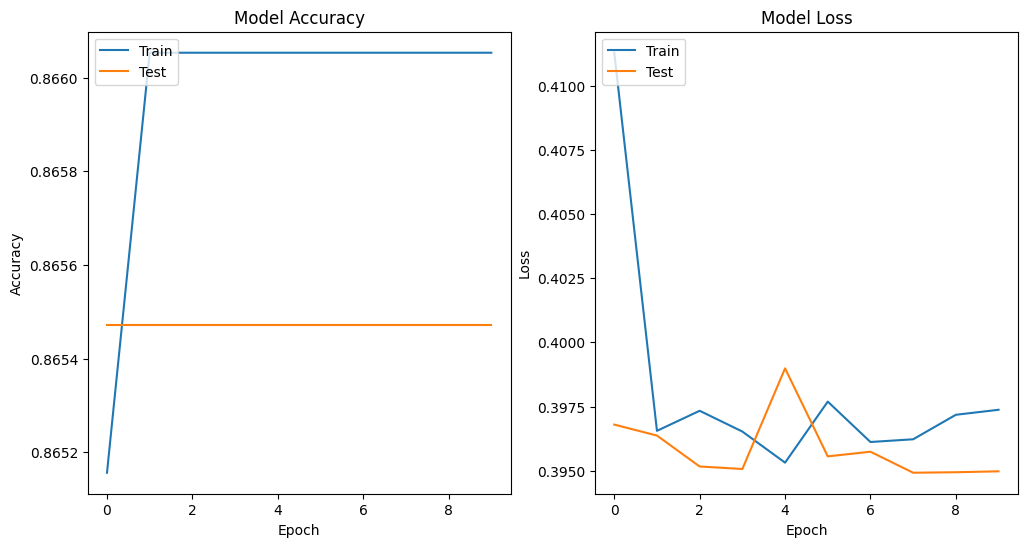

In [22]:
def plot_history(history):
    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()


plot_history(history)